###### The purpose of this script is to plot SPY (an ETF that is a benchmark for the market) and IYH (an ETF that is a benchmark for the healthcare sector, and observe the differences in prices and returns.

In [99]:
#dependancies
import pandas as pd
from pathlib import Path
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import pprint
import hvplot.pandas
from yahoo_fin.stock_info import get_data
import warnings
warnings.filterwarnings("ignore")

In [100]:
#finding the prices for each ETF over our analysis period
interval='1wk'
spy_weekly_price= get_data(ticker='SPY', start_date = '01/01/2017' , end_date = '31/12/2022', interval=interval)
iyh_weekly_price= get_data(ticker='IYH', start_date = '01/01/2017' , end_date = '31/12/2022', interval=interval)

x_axis_data = spy_weekly_price.index

<Figure size 640x1000 with 0 Axes>

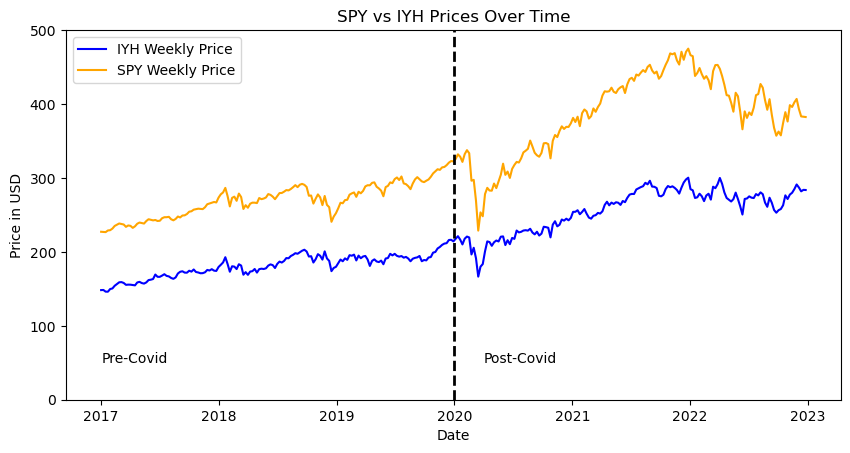

In [101]:
#plotting prices over time
plt.figure().set_figheight(10)

plt.figure().set_figwidth(10)

plt.plot(x_axis_data, iyh_weekly_price['close'], label = "IYH Weekly Price", color = 'blue')
plt.plot(x_axis_data, spy_weekly_price['close'], label = "SPY Weekly Price", color = 'orange')

plt.title('SPY vs IYH Prices Over Time')
plt.xlabel("Date")
plt.ylabel('Price in USD')
plt.ylim(0, 500)
plt.legend()
plt.vlines(pd.to_datetime('2020-01-01'), 0, 500, color='black', linestyle='--', lw=2)
plt.annotate('Pre-Covid', (pd.to_datetime('2017-01-01'),50), fontsize=10, color='black')
plt.annotate('Post-Covid', (pd.to_datetime('2020-04-01'),50), fontsize=10, color='black')
plt.savefig("SPY_vs_IYH_Prices.png")
plt.show()


In [91]:
#finding the prices for each ETF over our analysis period
interval='1mo'
spy_monthly_price= get_data(ticker='SPY', start_date = '01/01/2017' , end_date = '31/12/2022', interval=interval)
iyh_monthly_price= get_data(ticker='IYH', start_date = '01/01/2017' , end_date = '31/12/2022', interval=interval)

x_axis_data = spy_monthly_price.index

In [93]:
#adding monthly return column 
spy_monthly_price['monthly return']=""
iyh_monthly_price['monthly return']=""


In [94]:
#looping through spy_monthly_price to calculate monthly returns
w = 1
for c in range(0, len(spy_monthly_price['close']) - 1):
    monthly_ret = (spy_monthly_price['close'][w] - spy_monthly_price['close'][c])/spy_monthly_price['close'][c]
    spy_monthly_price.iloc[w,7] = monthly_ret*100
    w+=1

#setting first week return as 0
spy_monthly_price.iloc[0,7]= 0 

spy_monthly_price

,open,high,low,close,adjclose,volume,ticker,monthly return
2017-01-01,225.039993,229.710007,223.880005,227.529999,203.384354,1482408500,SPY,0
2017-02-01,227.529999,237.309998,226.820007,236.470001,211.375656,1365136600,SPY,3.929153
2017-03-01,238.389999,240.320007,231.610001,235.740005,210.723129,1921474100,SPY,-0.308705
2017-04-01,235.800003,239.529999,232.509995,238.080002,213.740601,1549613700,SPY,0.992617
2017-05-01,238.679993,242.080002,235.429993,241.440002,216.757141,1492547000,SPY,1.411291
...,...,...,...,...,...,...,...,...
2022-08-01,409.149994,431.730011,395.040009,395.179993,388.830475,1443394400,SPY,-4.080196
2022-09-01,392.890015,411.730011,357.040009,357.179993,351.441040,1998908600,SPY,-9.615871
2022-10-01,361.079987,389.519989,348.109985,386.209991,381.565552,2024732000,SPY,8.127555
2022-11-01,390.140015,407.679993,368.790009,407.679993,402.777435,1745985300,SPY,5.559152


In [95]:
#looping through iyh_monthly_price to calculate monthly returns
w = 1
for c in range(0, len(iyh_monthly_price['close']) - 1):
    monthly_ret = (iyh_monthly_price['close'][w] - iyh_monthly_price['close'][c])/iyh_monthly_price['close'][c]
    iyh_monthly_price.iloc[w,7] = monthly_ret*100
    w+=1

#setting first week return as 0
iyh_monthly_price.iloc[0,7]= 0 

iyh_monthly_price

,open,high,low,close,adjclose,volume,ticker,monthly return
2017-01-01,144.050003,150.410004,143.889999,147.539993,135.737305,3058000,IYH,0
2017-02-01,147.679993,157.619995,147.509995,156.970001,144.412964,1439100,IYH,6.391493
2017-03-01,158.880005,160.580002,153.979996,155.699997,143.244537,2770200,IYH,-0.809075
2017-04-01,155.779999,158.889999,153.570007,158.600006,146.328857,1186400,IYH,1.862562
2017-05-01,158.479996,159.899994,156.009995,158.940002,146.642563,1693800,IYH,0.214373
...,...,...,...,...,...,...,...,...
2022-08-01,277.070007,282.190002,261.100006,261.109985,258.070679,1863400,IYH,-6.136317
2022-09-01,260.070007,276.100006,251.720001,253.000000,250.055084,1791200,IYH,-3.105965
2022-10-01,254.910004,277.049988,250.100006,276.200012,274.078339,1056200,IYH,9.169965
2022-11-01,277.329987,289.660004,267.179993,289.660004,287.434937,959500,IYH,4.873277


In [96]:
#converting monthly return from str to float
iyh_monthly_price = iyh_monthly_price.astype({"monthly return":float})
spy_monthly_price = spy_monthly_price.astype({"monthly return":float})

iyh_monthly_price['monthly return']

2017-01-01    0.000000
2017-02-01    6.391493
2017-03-01   -0.809075
2017-04-01    1.862562
2017-05-01    0.214373
                ...   
2022-08-01   -6.136317
2022-09-01   -3.105965
2022-10-01    9.169965
2022-11-01    4.873277
2022-12-01   -2.054137
Name: monthly return, Length: 72, dtype: float64

<Figure size 640x1000 with 0 Axes>

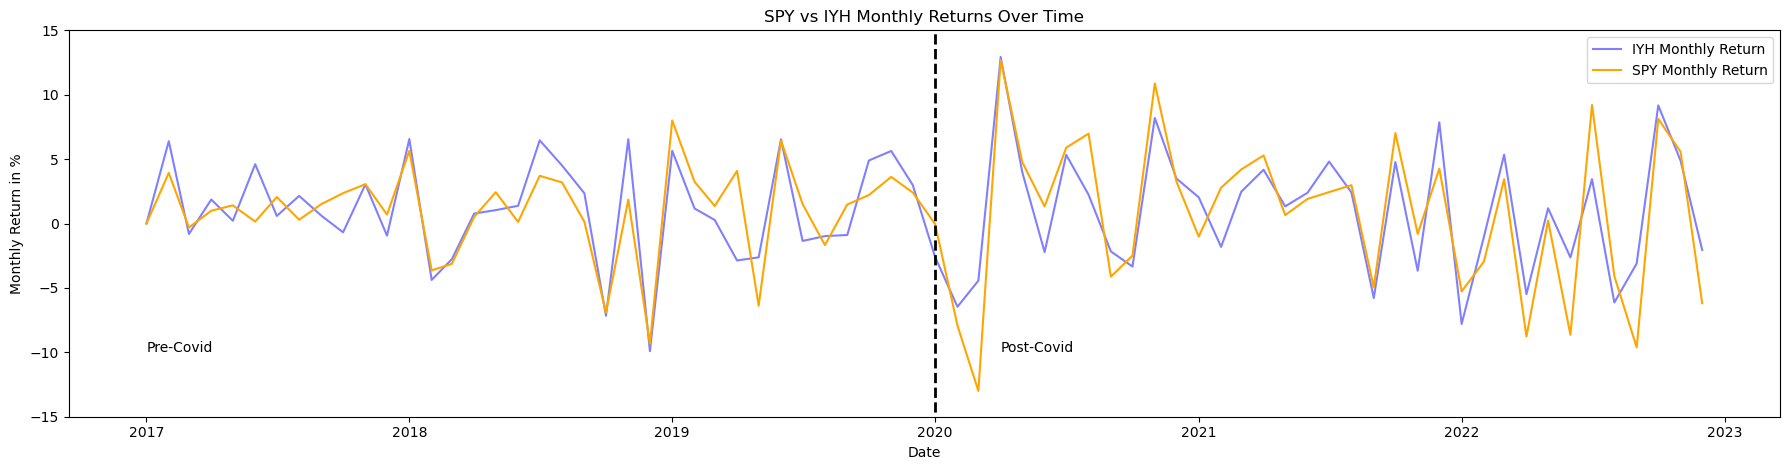

In [97]:
#plotting returns over time
plt.figure().set_figheight(10)

plt.figure().set_figwidth(18)

plt.plot(x_axis_data, iyh_monthly_price['monthly return'], label = "IYH Monthly Return", color = 'blue', alpha =0.5)
plt.plot(x_axis_data, spy_monthly_price['monthly return'], label = "SPY Monthly Return", color = 'orange', alpha=1)

plt.title('SPY vs IYH Monthly Returns Over Time')
plt.xlabel("Date")
plt.ylabel('Monthly Return in %')
plt.ylim(-15, 15)
plt.tight_layout()
plt.legend()
plt.vlines(pd.to_datetime('2020-01-01'), -20, 20, color='black', linestyle='--', lw=2)
plt.annotate('Pre-Covid', (pd.to_datetime('2017-01-01'),-10), fontsize=10, color='black')
plt.annotate('Post-Covid', (pd.to_datetime('2020-04-01'),-10), fontsize=10, color='black')
plt.savefig("SPY_vs_IYH_Returns.png")
plt.show()
